# Natural Language Processing Workshop :
# Analyzing wine descriptions, rating and predicing variety and price
<img src="https://secure.meetupstatic.com/photos/event/8/4/9/0/highres_485793936.jpeg">


### 1: Getting Started : Importing & cleaning data


 For the first part we will be reading the data, some basic exploration and cleaning. During this process we will also try to determine the quality of our data and decide on how to proceed with our data analysis.

In [1]:
# Pandas is an open source Python library that offers data structures and data analysis tools and operations. Read more at: https://pandas.pydata.org/
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First we start by importing the data
wine_reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")


In [3]:
# Check how large is our dataframe 
wine_reviews.shape

(129971, 14)

In [4]:
#Show the first 5 rows of the dataframe
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#checking the last two rows
wine_reviews.iloc[-2:]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit



From a brief overview of our data we can start by taking some steps in dropping columns that do not interest us and duplicated rows. For this exercice we decided to drop the columns of designation, region1, region2 as well as the twitter handle of the reviewer. The exta column unmnamed:0 is also dropped as this is replaced by the index.


In [6]:
#drop columns designation, region1, region2 and taster twitter details.
wine_df = wine_reviews.drop(columns=['designation','region_1', 'region_2', 'taster_twitter_handle', 'winery','Unnamed: 0' ])

In [7]:
wine_df.shape

(129971, 8)

In [8]:
#drop duplicate description
wine_df = wine_df.drop_duplicates('description')

In [9]:
wine_df.shape

(119955, 8)

In [10]:
#drop rows with NaN price, points and description
wine_df = wine_df.dropna(subset=['price', 'points', 'description'])
#Also we will drop any empty values
wine_df = wine_df.dropna()
wine_df.shape

(88244, 8)

In [11]:
print(wine_df['description'].groupby(wine_df['taster_name']).count().sort_values(ascending = False))

taster_name
Roger Voss            18543
Michael Schachner     13863
Kerin O’Keefe          8872
Paul Gregutt           8836
Virginie Boone         8681
Matt Kettmann          5642
Joe Czerwinski         4642
Sean P. Sullivan       4422
Anna Lee C. Iijima     3974
Jim Gordon             3761
Anne Krebiehl MW       3027
Lauren Buzzeo          1581
Susan Kostrzewa        1005
Mike DeSimone           441
Jeff Jenssen            415
Alexander Peartree      381
Carrie Dykes            128
Fiona Adams              24
Christina Pickard         6
Name: description, dtype: int64


In [12]:
print(wine_df['description'].groupby(wine_df['country']).count().sort_values(ascending = False))

country
US                        34261
France                    16041
Italy                      9117
Spain                      5985
Portugal                   4497
Chile                      4019
Argentina                  3498
Austria                    2527
Germany                    1924
Australia                  1887
New Zealand                1143
South Africa               1123
Israel                      448
Greece                      426
Canada                      223
Bulgaria                    132
Hungary                     127
Romania                     102
Uruguay                      98
Turkey                       81
Georgia                      74
Slovenia                     70
Croatia                      68
Mexico                       63
England                      59
Moldova                      56
Brazil                       44
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14


In [13]:
# how many varieties
varieties = wine_df.variety.value_counts()
varieties = varieties.to_frame('count').reset_index()
varieties.columns = ['variety', 'reviews']
varieties.shape


(653, 2)

In [14]:
#Of the 697 grape varieties represented in this dataset less than 10% have 90% of all reviews. 
#We can set a threshold drop varieties with less than 1000 reviews.
print(wine_df.variety.value_counts().head(60))

Pinot Noir                    9014
Chardonnay                    7586
Red Blend                     6252
Cabernet Sauvignon            5716
Bordeaux-style Red Blend      4455
Riesling                      4331
Sauvignon Blanc               3506
Syrah                         2844
Rosé                          2732
Malbec                        2327
Portuguese Red                2028
Merlot                        1911
Sangiovese                    1641
Tempranillo                   1597
Nebbiolo                      1595
White Blend                   1517
Sparkling Blend               1502
Zinfandel                     1444
Pinot Gris                    1157
Rhône-style Red Blend         1126
Grüner Veltliner              1011
Champagne Blend               1010
Cabernet Franc                 985
Portuguese White               905
Gewürztraminer                 769
Gamay                          749
Viognier                       699
Shiraz                         672
Bordeaux-style White

In [15]:
wines1 = wine_df.merge(varieties, on="variety", how='left')
wines = wines1[wines1['reviews'] >= 1000]
wines.head(10)

,country,description,points,price,province,taster_name,title,variety,reviews
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2028
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,1157
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,4331
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,9014
8,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,1157
9,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,5716
11,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,5716
12,US,Building on 150 years and six generations of w...,87,12.0,California,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,7586
13,Germany,Zesty orange peels and apple notes abound in t...,87,24.0,Mosel,Anna Lee C. Iijima,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,4331
14,Argentina,"Baked plum, molasses, balsamic vinegar and che...",87,30.0,Other,Michael Schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,2327


In [16]:
# double check how many unique varieties we have left
wines.variety.nunique()

22

### Part 2: Exploratory Data Analysis & Visualization 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

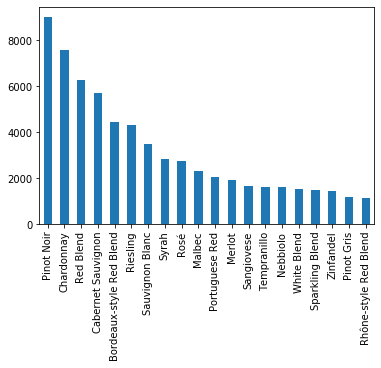

In [18]:
wines['variety'].value_counts().head(20).plot.bar()


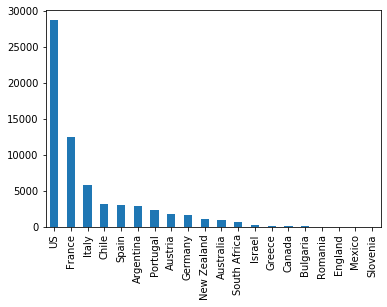

In [19]:
wines['country'].value_counts().head(20).plot.bar()

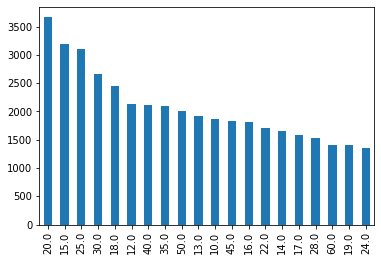

In [20]:
wines['price'].value_counts().head(20).plot.bar()

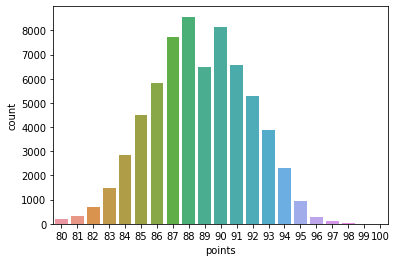

In [21]:
# Score distrubution (Every wine gets a score between 80 and 100)
sns.countplot(wines['points'])

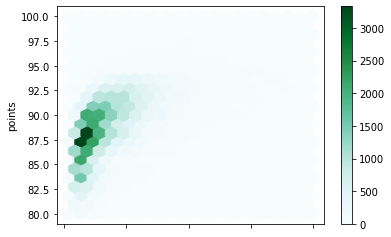

In [22]:
# Hexplot
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
from scipy.stats import kurtosis, skew 
from scipy import stats
wines[wines['price'] < 200].plot.hexbin(x="price", y="points", gridsize=20)

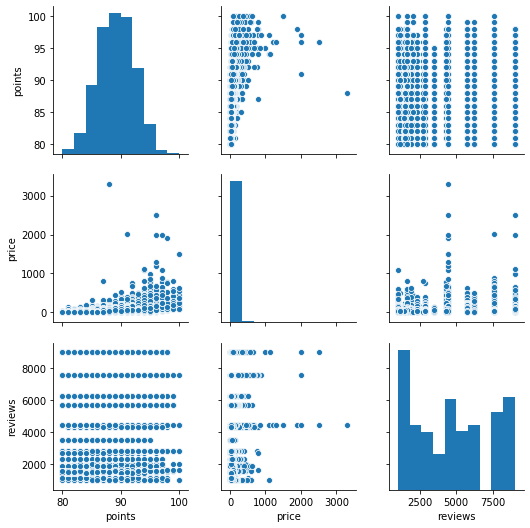

In [23]:
#pair plots are very useful to give us ideas on how to proceed with data cleaning and possible correlations
sns.pairplot(wines)

In [24]:
#!pip install plotnine
from plotnine import *

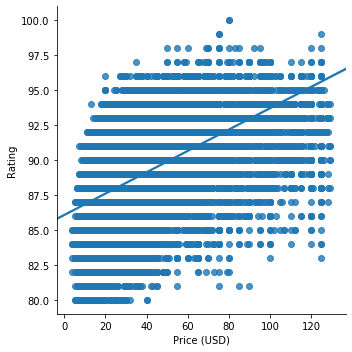

In [25]:
prices_by_variety = wines[["price", "variety"]].dropna()
ratings_by_price = wines[["price", "points"]]

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

ax = sns.lmplot(x = "price", y = "points", data = ratings_by_price)


ax.set(xlabel = "Price (USD)", ylabel = "Rating")

plt.show()

In [26]:
# Is there a relationship between wine price and variety?
wines_per_variety = wines[wines['variety'].isin(wines['variety'].value_counts().head(5).index)].dropna()
# Remove all data greater than the 98th percentile
val = wines_per_variety["price"].quantile(0.98)
wines_per_variety = wines_per_variety[wines_per_variety["price"] < val]

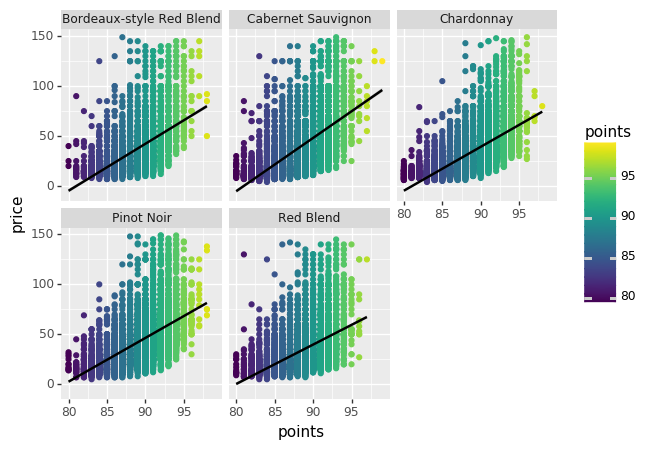

<ggplot: (-9223371903008312084)>

In [27]:
# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

(ggplot(wines_per_variety)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)


### Part 3 : Predicting Wine Variety from Text Reviews


In [28]:
#The purpose of this part is to familiarize with NLP techniques.

In [29]:
#At this point we can choose which and how many features we like to go with. 
#We will start by only using the description

#Let's start with TfidfVectorizer with no text pre-processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [30]:
#Below are a set of libraries that can be used, we recommend to only install spacy for now
#!pip install nltk
#!pip install spacy
#!python -m spacy download en
#!pip install wordcloud
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [31]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [32]:
# We will update the stop words that we want to be removed from the review description. These include any ferenece to the grape variety we are trying to predict and also colour reference.
# We check also for both lower and upper case sentences.
grape_variety = wines.variety.unique().tolist()
grape_variety_lc = [x.lower() for x in grape_variety]
grape_variety_broken = [i.replace('-', ' ').replace(',', ' ').split(' ') for i in grape_variety_lc]
grape_variety_broken = [item for sublist in grape_variety_broken for item in sublist]
grape_variety_broken.remove('red')
grape_variety_broken.remove('white')

In [33]:
stop_words1 = stop_words.update(grape_variety,grape_variety_lc,grape_variety_broken)
stop_words1

In [34]:
X = wines['description']
y = wines['variety']

#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
#Bag of words vectorization
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = stop_words1, ngram_range=(1, 3), max_features=3000) 
X_train_vec = vec.fit_transform(X_train)
X_train_vec

<53041x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 2520426 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_vec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
X_test_vec= vec.transform(X_test)
y_pred = logit.predict(X_test_vec)
list(zip(y_pred, y_test))[:10]

[('Sparkling Blend', 'Chardonnay'),
 ('Syrah', 'Malbec'),
 ('Cabernet Sauvignon', 'Cabernet Sauvignon'),
 ('Sauvignon Blanc', 'Sauvignon Blanc'),
 ('Riesling', 'Sauvignon Blanc'),
 ('Pinot Noir', 'Pinot Noir'),
 ('Pinot Gris', 'Pinot Gris'),
 ('Portuguese Red', 'Portuguese Red'),
 ('Pinot Noir', 'Merlot'),
 ('Riesling', 'Grüner Veltliner')]

In [38]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.6560591207299601

In [39]:
print(metrics.classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.66      0.67      0.67       879
      Cabernet Sauvignon       0.57      0.60      0.59      1135
         Champagne Blend       0.69      0.58      0.63       213
              Chardonnay       0.73      0.84      0.78      1501
        Grüner Veltliner       0.69      0.64      0.67       209
                  Malbec       0.55      0.50      0.52       480
                  Merlot       0.42      0.28      0.34       393
                Nebbiolo       0.68      0.71      0.70       277
              Pinot Gris       0.69      0.47      0.56       260
              Pinot Noir       0.70      0.78      0.74      1857
          Portuguese Red       0.61      0.65      0.63       421
               Red Blend       0.64      0.62      0.63      1201
   Rhône-style Red Blend       0.66      0.53      0.58       217
                Riesling       0.80      0.87      0.83       828
         

In [40]:
# Try TFIDF 
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer()
X_tf = tf.fit_transform(X_train_vec)
X_tf.shape


(53041, 3000)

In [41]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
X_test_vec= vec.transform(X_test)
X_test_tf = tf.transform(X_test_vec)
y_pred = logit.predict(X_test_tf)

In [43]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.6605836663901666

In [44]:
# This is a low prediction score, but before we worry about increasing accuracy let's reflect on what we were trying to predict.
# We took text reviews with words reflecting on taste, smell etc and trying to predict the variety of wines.
# Essentially, this was a blind testing experiement. Would it make sense if we had a higher prediction accuracy?

### Part 4 : Predicting Wine Price from Text Reviews

In [45]:
# For the next step we need to make a decision of the type of learning algorithm we want to use. 
# We should also decide if we want to process each word as a vector or the whole review as a vector.

In [46]:
#As a first step step we can chose to drop very high wine prices.
wine_df['price'].describe()

count    88244.000000
mean        35.294502
std         44.409695
min          4.000000
25%         17.000000
50%         25.000000
75%         42.000000
max       3300.000000
Name: price, dtype: float64

In [47]:
wine_df.shape

(88244, 8)

In [48]:
wines_df_price = wine_df[wine_df["price"] <= 100]

In [49]:
#changing price from float to integer with the help of numpy
wines_df_price['price'] = wines_df_price['price'].astype(np.int64)

In [50]:
wines_df_price['price'].head(2)

1    15
2    14
Name: price, dtype: int64

In [51]:
wines_df_price['price'].describe()

count    85686.000000
mean        30.595535
std         19.176729
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max        100.000000
Name: price, dtype: float64

In [52]:
wines_df_price["price"].value_counts().head(10)

20    5188
15    4626
25    4322
30    3555
18    3513
12    3053
13    2790
35    2692
40    2655
10    2635
Name: price, dtype: int64

In [53]:
# We create price groups for convinience and because we want to create discrete values instead of continuous.
# We also create a new column price category (categories selected after checking distribution of price per category)

def prices_to_class(price):
    if price in range(0,20):
        return 0
    elif price in range(20,31):
        return 1
    elif price in range(31,101):
        return 2
    else:
        return 3
    
wines_df_price["price_cat"] = wines_df_price["price"].apply(prices_to_class)

In [54]:
#Checking the categories and making sure that the 3rd group is empty
wines_df_price["price_cat"].value_counts()

2    30908
0    29870
1    24908
Name: price_cat, dtype: int64

In [55]:
X = wines_df_price['description']
y = wines_df_price['price_cat']

#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
#Bag of words vectorization
vec = CountVectorizer(stop_words = stop_words, ngram_range=(1, 3), max_features=3000) 
X_train_vec = vec.fit_transform(X_train)
X_train_vec

<68548x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 1714639 stored elements in Compressed Sparse Row format>

In [57]:
tf = TfidfTransformer()
X_tf = tf.fit_transform(X_train_vec)
X_tf.shape


(68548, 3000)

In [58]:
logit = LogisticRegression()
logit.fit(X_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
X_test_vec= vec.transform(X_test)
X_test_tf = tf.transform(X_test_vec)
y_pred = logit.predict(X_test_tf)

In [60]:
metrics.accuracy_score(y_test, y_pred)

0.5992531217178201

In [63]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68      5913
           1       0.42      0.23      0.29      4970
           2       0.64      0.76      0.70      6255

    accuracy                           0.60     17138
   macro avg       0.56      0.58      0.56     17138
weighted avg       0.57      0.60      0.57     17138



In [61]:
# Can you suggest ways to increase our accuracy ?

### Part 5 : Predicting Wine Price from Text Reviews (advanced )

In [62]:
# Try to develop a pipeline predicting wine price. (hint: processing text by embedding each word in its own vector. Predict with a Recurrent Neural Network )

References & additional reading material: https://towardsdatascience.com/generating-wine-recommendations-using-the-universal-sentence-encoder-d086edd13d00, https://www.kaggle.com/zynicide/wine-reviews, https://nlp.stanford.edu/projects/glove/, https://towardsdatascience.com/predicting-wine-quality-using-text-reviews-8bddaeb5285d, https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03, https://www.kaggle.com/jellyfish0821/wine-reviews-machine-learning-pipeline, https://mlcourse.ai/